In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np

In [15]:
data = pd.read_csv('../data/raw_data.csv', skiprows=3)
data = data.drop(['Unnamed: 0', 'result', 'table'], axis=1)
data

,_start,_stop,_time,_value,_field,_measurement,zählername
0,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T00:15:00Z,4447.924999,counter,stromzaehler,Hausanschluss
1,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T00:30:00Z,4448.149197,counter,stromzaehler,Hausanschluss
2,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T00:45:00Z,4448.391416,counter,stromzaehler,Hausanschluss
3,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T01:00:00Z,4448.619568,counter,stromzaehler,Hausanschluss
4,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2022-09-01T01:15:00Z,4448.845053,counter,stromzaehler,Hausanschluss
...,...,...,...,...,...,...,...
35028,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2023-08-31T21:15:00Z,6756.948733,counter,stromzaehler,Hausanschluss
35029,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2023-08-31T21:30:00Z,6757.162733,counter,stromzaehler,Hausanschluss
35030,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2023-08-31T21:45:00Z,6757.420233,counter,stromzaehler,Hausanschluss
35031,2022-09-01T00:00:00Z,2023-09-01T00:00:00Z,2023-08-31T22:00:00Z,6757.659178,counter,stromzaehler,Hausanschluss


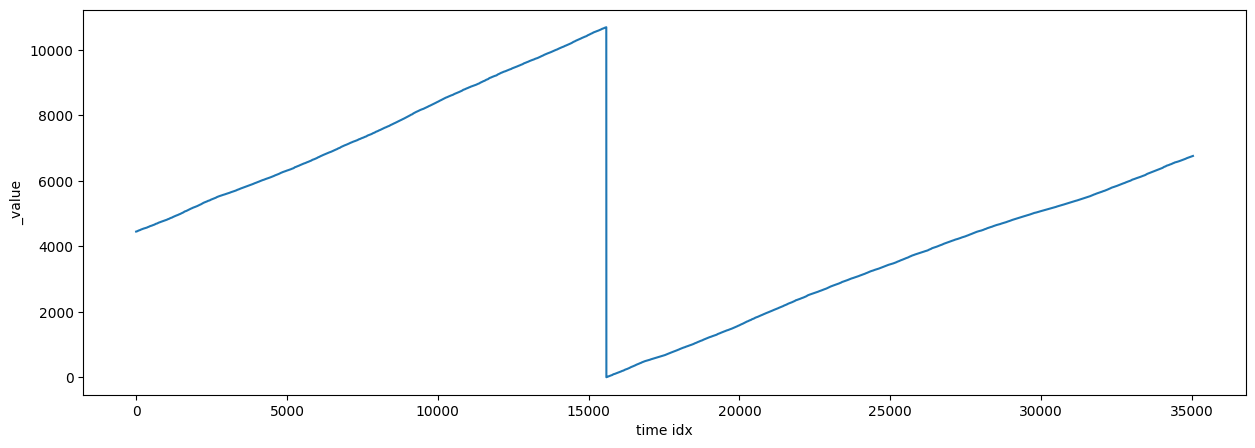

In [16]:
target = data['_value']
features = data['_time']

plt.figure(figsize=(15,5))
plt.plot(target)
plt.xlabel('time idx')
plt.ylabel('_value')
plt.show()

In [17]:
# split data and put on top
jump_idx = target[target == 0].index.item()
print(jump_idx)

part_1 = target[:jump_idx-3]
part_2 = target[jump_idx:]

diff = target[jump_idx-3]
part_2 += diff

target = pd.concat([part_1, part_2], axis=0)
target.shape

15588


(35030,)

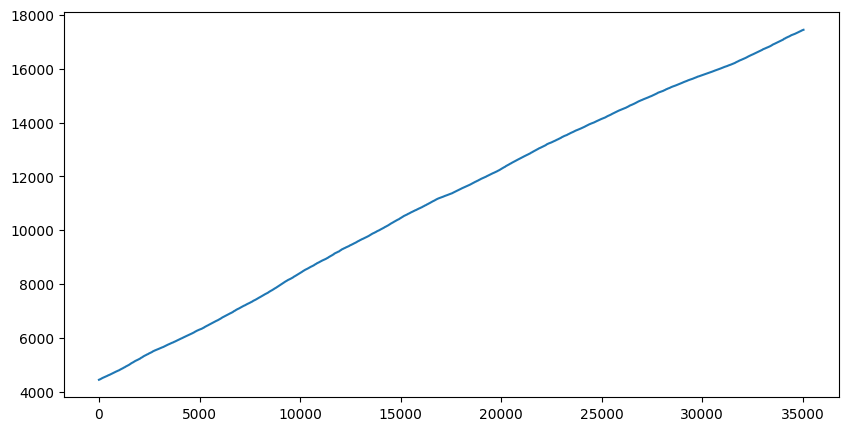

In [18]:
plt.figure(figsize=(10,5))
plt.plot(target)
plt.show()

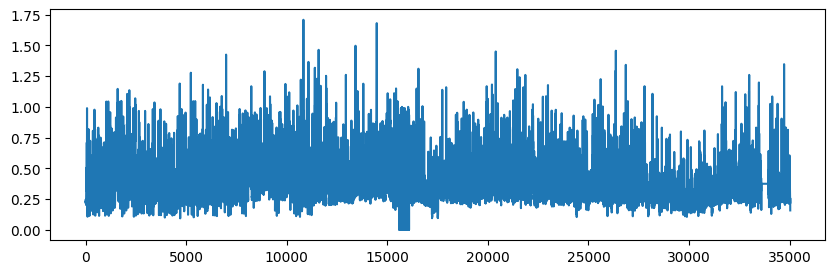

In [19]:
diff = target.diff()
diff = diff.drop([0], axis=0)
features = features.drop([0], axis=0)
plt.figure(figsize=(10,3))
plt.plot(diff)
plt.show()

In [20]:
features.shape

(35032,)

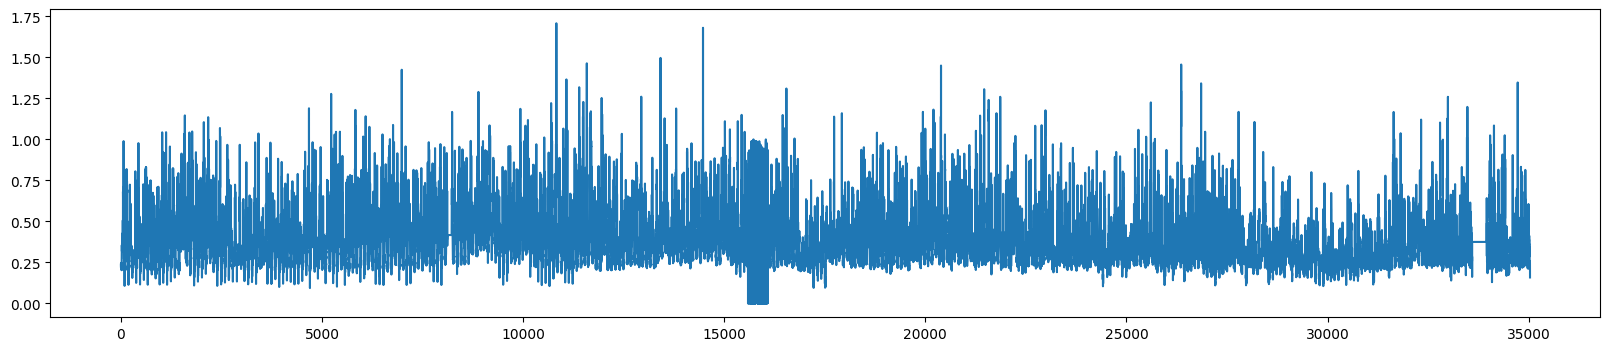

In [21]:
plt.figure(figsize=(20,4))
plt.plot(diff)
plt.show()

In [22]:
diff.isnull().values.any()

False

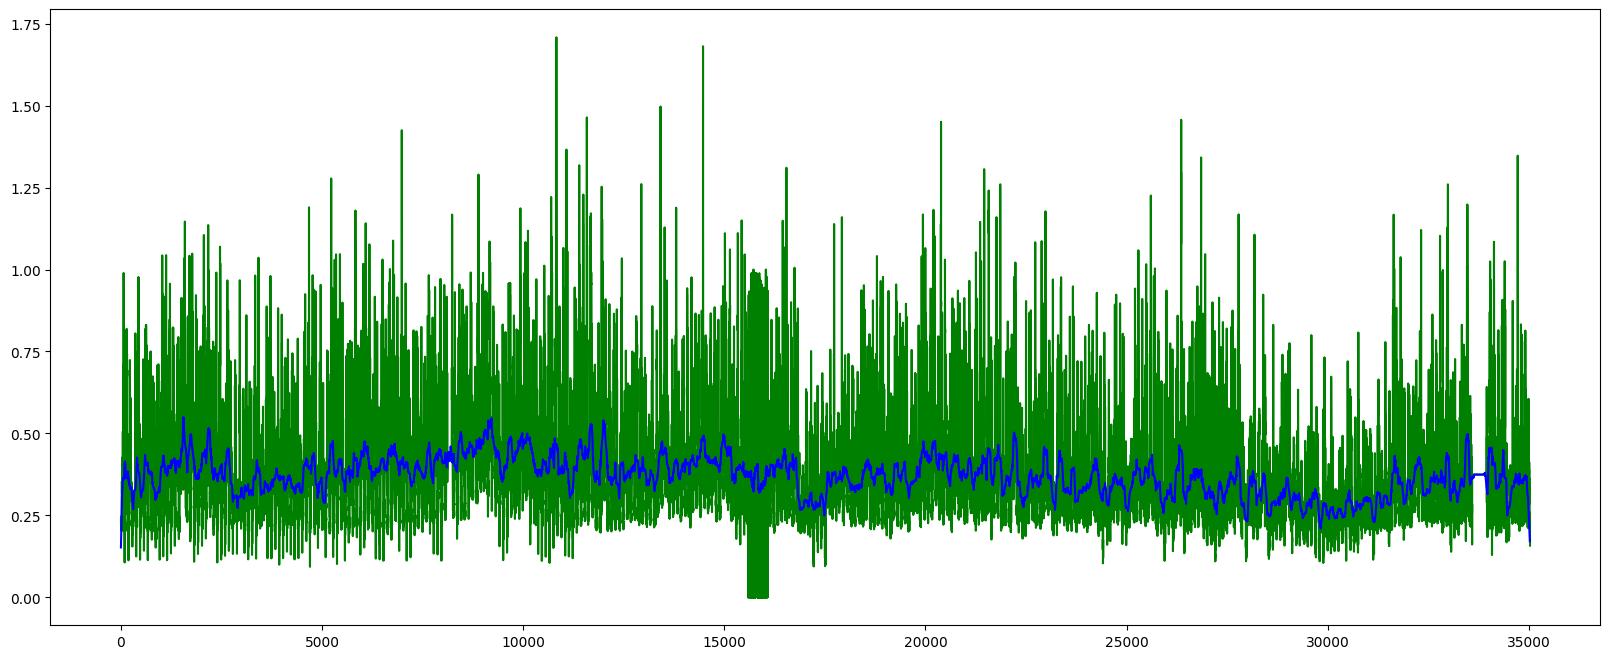

In [23]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), "same") / w

plt.figure(figsize=(20,8))
plt.plot(diff, color='green')
plt.plot(moving_average(diff.iloc[:],96), color='blue')
plt.show()

In [24]:
# put into one dataframe
df = pd.concat([features, diff], axis=1)
df.set_index('_time', inplace=True)


In [25]:
# train test split
train_idx_end = int(0.8*len(df))

train = df.iloc[:train_idx_end]
test = df.iloc[train_idx_end:]

train.to_csv('../data/train.csv')
test.to_csv('../data/test.csv')